In [10]:
import torch
import numpy as np

# Ch3 Fully Connect Network

## 1 Linear Regression

In [11]:
from torch.autograd import Variable
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
%matplotlib inline

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


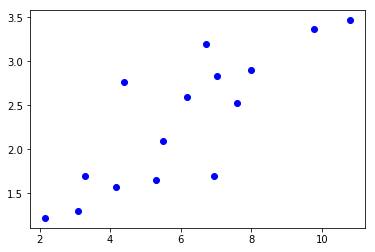

In [12]:
plt.plot(x_train, y_train, 'bo')

In [13]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear=nn.Linear(1,1)
        
    def forward(self,x):
        out=self.linear(x)
        return out

model=LinearRegression()
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [30]:
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=0.001)
optimizer

In [45]:
for epoch in range(10000):
    inputs=Variable(x_train)
    target=Variable(y_train)
    out=model(inputs)
    loss=criterion(out, target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}],loss: {:.6f}'.format(epoch+1, 10000, loss.data[0]))

Epoch[20/10000],loss: 0.168943
Epoch[40/10000],loss: 0.168943
Epoch[60/10000],loss: 0.168942
Epoch[80/10000],loss: 0.168942
Epoch[100/10000],loss: 0.168942
Epoch[120/10000],loss: 0.168942
Epoch[140/10000],loss: 0.168941
Epoch[160/10000],loss: 0.168941
Epoch[180/10000],loss: 0.168941
Epoch[200/10000],loss: 0.168940
Epoch[220/10000],loss: 0.168940
Epoch[240/10000],loss: 0.168940
Epoch[260/10000],loss: 0.168940
Epoch[280/10000],loss: 0.168940
Epoch[300/10000],loss: 0.168939
Epoch[320/10000],loss: 0.168939
Epoch[340/10000],loss: 0.168939
Epoch[360/10000],loss: 0.168939
Epoch[380/10000],loss: 0.168938
Epoch[400/10000],loss: 0.168938
Epoch[420/10000],loss: 0.168938
Epoch[440/10000],loss: 0.168938
Epoch[460/10000],loss: 0.168937
Epoch[480/10000],loss: 0.168937
Epoch[500/10000],loss: 0.168937
Epoch[520/10000],loss: 0.168937
Epoch[540/10000],loss: 0.168936
Epoch[560/10000],loss: 0.168936
Epoch[580/10000],loss: 0.168936
Epoch[600/10000],loss: 0.168936
Epoch[620/10000],loss: 0.168936
Epoch[640/10

Epoch[6180/10000],loss: 0.168916
Epoch[6200/10000],loss: 0.168916
Epoch[6220/10000],loss: 0.168916
Epoch[6240/10000],loss: 0.168916
Epoch[6260/10000],loss: 0.168916
Epoch[6280/10000],loss: 0.168916
Epoch[6300/10000],loss: 0.168916
Epoch[6320/10000],loss: 0.168916
Epoch[6340/10000],loss: 0.168916
Epoch[6360/10000],loss: 0.168916
Epoch[6380/10000],loss: 0.168916
Epoch[6400/10000],loss: 0.168916
Epoch[6420/10000],loss: 0.168916
Epoch[6440/10000],loss: 0.168916
Epoch[6460/10000],loss: 0.168916
Epoch[6480/10000],loss: 0.168916
Epoch[6500/10000],loss: 0.168916
Epoch[6520/10000],loss: 0.168916
Epoch[6540/10000],loss: 0.168916
Epoch[6560/10000],loss: 0.168916
Epoch[6580/10000],loss: 0.168916
Epoch[6600/10000],loss: 0.168916
Epoch[6620/10000],loss: 0.168916
Epoch[6640/10000],loss: 0.168916
Epoch[6660/10000],loss: 0.168916
Epoch[6680/10000],loss: 0.168916
Epoch[6700/10000],loss: 0.168916
Epoch[6720/10000],loss: 0.168916
Epoch[6740/10000],loss: 0.168916
Epoch[6760/10000],loss: 0.168916
Epoch[6780

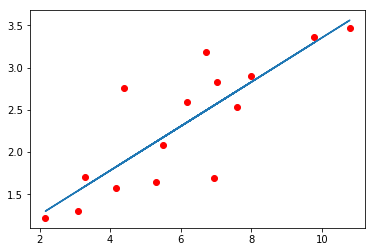

In [44]:
model.eval()
predict=model(Variable(x_train))
predict=predict.data.numpy()
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original data')
plt.plot(x_train.numpy(),predict,label='Fitting Line')
plt.show()

## 2 Neural Network

In [1]:
import torch
import numpy as np
from torch.autograd import Variable
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torchvision.datasets import mnist
%matplotlib inline

#train_set = mnist.MNIST('./data', train=True, download=True)
#test_set = mnist.MNIST('./data', train=False, download=True)

In [2]:
def data_tf(x):
    x = np.array(x, dtype='float32')
    x = (x - 0.5) / 0.5 # 标准化，这个技巧之后会讲到
    x = x.reshape((-1,)) # 拉平
    x = torch.from_numpy(x)
    return x

train_set = mnist.MNIST('./data', train=True, transform=data_tf, download=True)
test_set = mnist.MNIST('./data', train=False, transform=data_tf, download=True)

In [3]:
from torch.utils.data import DataLoader
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(test_set, batch_size=128, shuffle=False)

In [4]:
class simplenet(nn.Module):
    def __init__ (self, in_dim, hidden1_dim, hidden2_dim, out_dim):
        super(simplenet, self) .__init__()
        self.layer1=nn.Linear(in_dim, hidden1_dim)
        self.layer2=nn.Linear(hidden1_dim, hidden2_dim)
        self.layer3=nn.Linear(hidden2_dim, out_dim)
        self.acti=nn.ReLU(True)
        
    def forward(self,x):
        x=self.layer1(x)
        x=self.acti(x)
        x=self.layer2(x)
        x=self.acti(x)
        x=self.layer3(x)
        return x

In [5]:
net=simplenet(28*28,300,100,10)
# 定义 loss 函数
criterion = nn.CrossEntropyLoss()
optimzier = torch.optim.SGD(net.parameters(), 1e-3) # 使用随机梯度下降，学习率 0.01

In [6]:
losses = []
acces = []
eval_losses = []
eval_acces = []

for e in range(20):
    train_loss = 0
    train_acc = 0
    net.train()
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        optimzier.zero_grad()
        loss.backward()
        optimzier.step()
        # 记录误差
        train_loss += loss.data[0]
        # 计算分类的准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().data[0]
        acc = num_correct / im.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
        # 在测试集上检验效果
    eval_loss = 0
    eval_acc = 0
    net.eval() # 将模型改为预测模式
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        # 记录误差
        eval_loss += loss.data[0]
        # 记录准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().data[0]
        acc = num_correct / im.shape[0]
        eval_acc += acc
        
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(e, train_loss / len(train_data), train_acc / len(train_data), 
                     eval_loss / len(test_data), eval_acc / len(test_data)))

epoch: 0, Train Loss: 0.518659, Train Acc: 0.881447, Eval Loss: 0.228218, Eval Acc: 0.934138
epoch: 1, Train Loss: 0.179036, Train Acc: 0.946662, Eval Loss: 0.169164, Eval Acc: 0.950850
epoch: 2, Train Loss: 0.129327, Train Acc: 0.961271, Eval Loss: 0.147336, Eval Acc: 0.955993
epoch: 3, Train Loss: 0.101175, Train Acc: 0.969516, Eval Loss: 0.150148, Eval Acc: 0.955597
epoch: 4, Train Loss: 0.080857, Train Acc: 0.975613, Eval Loss: 0.130222, Eval Acc: 0.961432
epoch: 5, Train Loss: 0.065060, Train Acc: 0.980744, Eval Loss: 0.124515, Eval Acc: 0.964893
epoch: 6, Train Loss: 0.053388, Train Acc: 0.984442, Eval Loss: 0.122775, Eval Acc: 0.964003
epoch: 7, Train Loss: 0.044556, Train Acc: 0.987457, Eval Loss: 0.122080, Eval Acc: 0.965882
epoch: 8, Train Loss: 0.036886, Train Acc: 0.990022, Eval Loss: 0.122893, Eval Acc: 0.966080
epoch: 9, Train Loss: 0.030323, Train Acc: 0.992154, Eval Loss: 0.122075, Eval Acc: 0.966377
epoch: 10, Train Loss: 0.025416, Train Acc: 0.994003, Eval Loss: 0.125

Text(0.5,1,'train acc')

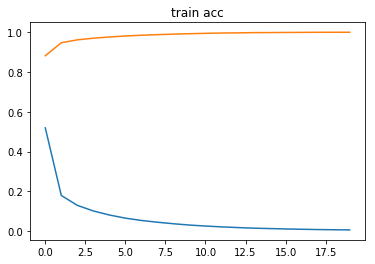

In [9]:
plt.title('train loss')
plt.plot(np.arange(len(losses)), losses)
plt.plot(np.arange(len(acces)), acces)
plt.title('train acc')

Text(0.5,1,'test acc')

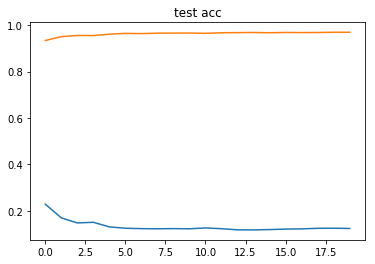

In [8]:
plt.plot(np.arange(len(eval_losses)), eval_losses)
plt.title('test loss')
plt.plot(np.arange(len(eval_acces)), eval_acces)
plt.title('test acc')